<a href="https://colab.research.google.com/github/Nataliia-Shap/SofPR/blob/main/%D0%9F%D1%80%D0%B8%D0%BA%D0%BB%D0%B0%D0%B4_5_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Приклад 1. 

(1797, 64)


<Figure size 432x288 with 0 Axes>

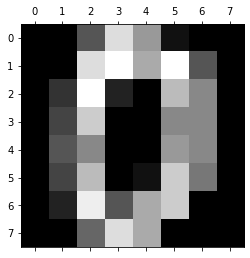

In [ ]:
# необхідні бібліотеки
import numpy as np
import random
from keras.datasets import mnist
# класифікатор та метрики
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB,MultinomialNB
# завантажимо дані та розіб'ємо на навчальну та перевірочну
digits = load_digits()
print(digits.data.shape)
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 
data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size
#data_pca = PCA(n_components=n_digits).fit_transform(data)
data_pca=data
data_train=data[0:1436,:]
data_test=data[1437:1797,:]
labels_train=labels[0:1436]
labels_test=labels[1437:1797]



### Байєсівський класифікатор

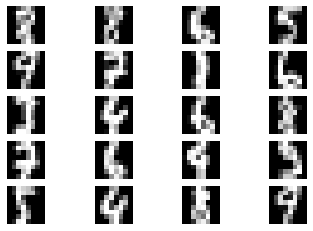

[6. 8. 9. 0. 6. 0. 9. 3. 2. 2. 8. 7. 3. 8. 5. 8. 0. 1. 9. 6.]
[8. 8. 6. 5. 9. 7. 1. 6. 3. 4. 6. 8. 7. 6. 4. 9. 5. 4. 8. 9.]
0.8138888888888889


In [ ]:
clf_nb = GaussianNB()
clf_nb.fit(data_train,labels_train)
# зробимо класифікацію за допомогою навченою моделі
y_test_pred_nb = clf_nb.predict(data_test)
lbl_NB = np.zeros(20)
lbl_= np.zeros(20)
for i in range(1,21):
  im_idx = random.randint(0,359)
  lbl_NB[i-1]=y_test_pred_nb[im_idx]
  lbl_[i-1]=labels_train[im_idx]
  plt.subplot(5, 4, i)
  plt.imshow(digits.images[im_idx], cmap='gray')
  plt.axis('off')
plt.show()
print(lbl_NB[:20])
print(lbl_[:20])
a_NB = accuracy_score(labels_test, y_test_pred_nb)
print(a_NB)
#print(labels_test)
#print(y_test_pred_nb)

### kmeans

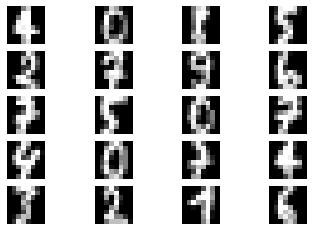

[6. 5. 9. 1. 9. 1. 1. 6. 6. 2. 1. 6. 0. 6. 0. 0. 9. 7. 5. 0.]
[6. 5. 3. 9. 9. 1. 3. 6. 6. 2. 1. 6. 0. 6. 0. 0. 9. 7. 5. 0.]
0.7194444444444444


In [ ]:
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4,random_state=0).fit(data_pca)
#Використаємо навчений класифікатор
km_predict=kmeans.predict(data_test)
reference_labels = {}
for i in range(len(np.unique(km_predict))):
  index = np.where(km_predict == i,1,0)
  num = np.bincount(labels_test[index==1]).argmax()
  reference_labels[i] = num
  number_labels = np.random.rand(len(km_predict))
for i in range(len(km_predict)):
  number_labels[i] = reference_labels[km_predict[i]]
lbl_kmeans = np.zeros(20)
lbl_= np.zeros(20)
for i in range(1,21):
  im_idx = random.randint(0,359)
  lbl_kmeans[i-1]=number_labels[im_idx]
  lbl_[i-1]=labels_test[im_idx]
  plt.subplot(5, 4, i)
  plt.imshow(digits.images[im_idx], cmap='gray')
  plt.axis('off')
plt.show()
print(lbl_kmeans[:20])
print(lbl_[:20])
a_km = accuracy_score(labels_test, number_labels)
print(a_km)